In [37]:
%pylab
%matplotlib inline
import pandas as pd
import seaborn as sns
sns.set()

Using matplotlib backend: MacOSX
Populating the interactive namespace from numpy and matplotlib


In [1]:
df = pd.read_excel('http://qrc.depaul.edu/Excel_Files/Presidents.xlsx', sheet_name='Master',
                  na_values='NA()')
df.index = range(1,len(df)+1)
df

Using matplotlib backend: <object object at 0x7ff670a8ca70>
Populating the interactive namespace from numpy and matplotlib


,No,President,Years in office,Year first inaugurated,Age at inauguration,State elected from,# of electoral votes,# of popular votes,National total votes,Total electoral votes,Rating points,Political Party,Occupation,College,% electoral,% popular
1,1,George Washington,8.0,1789,57,Virginia,69.0,NaN,NaN,69.0,842.0,None,Planter,None,100.000000,NaN
2,2,John Adams,4.0,1797,61,Massachusetts,132.0,NaN,NaN,139.0,598.0,Federalist,Lawyer,Harvard,94.964029,NaN
3,3,Thomas Jefferson,8.0,1801,57,Virginia,73.0,NaN,NaN,137.0,711.0,Democratic-Republican,"Planter, Lawyer",William and Mary,53.284672,NaN
4,4,James Madison,8.0,1809,57,Virginia,122.0,NaN,NaN,176.0,567.0,Democratic-Republican,Lawyer,Princeton,69.318182,NaN
5,5,James Monroe,8.0,1817,58,Virginia,183.0,NaN,NaN,221.0,602.0,Democratic-Republican,Lawyer,William and Mary,82.805430,NaN
6,6,John Quincy Adams,4.0,1825,57,Massachusetts,84.0,NaN,NaN,261.0,564.0,Democratic-Republican,Lawyer,Harvard,32.183908,NaN
7,7,Andrew Jackson,8.0,1829,61,Tennessee,178.0,642553.0,1148018.0,261.0,632.0,Democrat,Lawyer,None,68.199234,55.970638
8,8,Martin Van Buren,4.0,1837,54,New York,170.0,764176.0,1503534.0,294.0,429.0,Democrat,Lawyer,None,57.823129,50.825322
9,9,William Henry Harrison,0.8,1841,68,Ohio,234.0,1275390.0,2411808.0,294.0,329.0,Whig,Soldier,Hampden-Sydney,79.591837,52.881075
10,10,John Tyler,4.0,1841,51,Virginia,NaN,NaN,NaN,NaN,369.0,Whig,Lawyer,William and Mary,NaN,NaN


In [2]:
%matplotlib inline
parties = df['Political Party'].value_counts()
parties

Republican               19
Democrat                 16
Democratic-Republican     4
Whig                      4
None                      1
Federalist                1
National Union            1
Name: Political Party, dtype: int64

<AxesSubplot:>

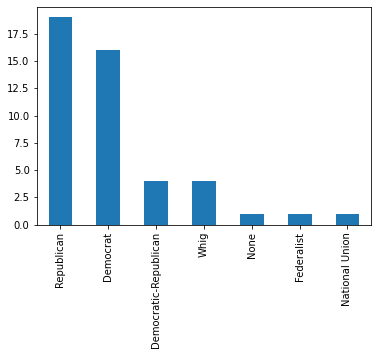

In [3]:
parties.plot(kind="bar")

In [4]:
occupations = df['Occupation'].value_counts()
occupations

Lawyer             27
Businessman         5
Soldier             4
Author              2
Planter             1
Planter, Lawyer     1
Tailor              1
Educator            1
Editor              1
Engineer            1
Teacher             1
Actor               1
Name: Occupation, dtype: int64

<AxesSubplot:ylabel='Occupation'>

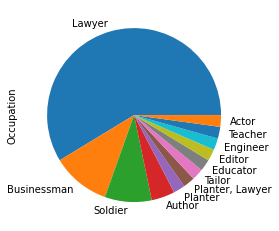

In [5]:
occupations.plot(kind="pie")

In [6]:
plt.hlines?

Text(0, 0.5, '% Of Popular Vote')

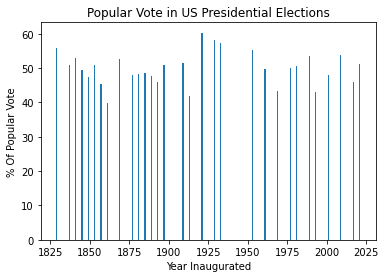

In [7]:
plt.bar(df['Year first inaugurated'].values, df['% popular'].values)
plt.title("Popular Vote in US Presidential Elections")
plt.xlabel("Year Inaugurated")
plt.ylabel("% Of Popular Vote")

In [51]:
gb = df[['State elected from', 'Age at inauguration']].groupby('State elected from').agg("max").sort_values(by="Age at inauguration").reset_index()
gb

,State elected from,Age at inauguration
0,Arkansas,46
1,New Hampshire,48
2,Georgia,52
3,Illinois,52
4,Indiana,55
5,New Jersey,56
6,Virginia,58
7,Missouri,60
8,Massachusetts,61
9,Tennessee,61


In [52]:
pt = df.pivot_table(index='State elected from', values="Age at inauguration", aggfunc="max").sort_values(by="Age at inauguration").reset_index()
pt

,State elected from,Age at inauguration
0,Arkansas,46
1,New Hampshire,48
2,Georgia,52
3,Illinois,52
4,Indiana,55
5,New Jersey,56
6,Virginia,58
7,Missouri,60
8,Massachusetts,61
9,Tennessee,61


In [53]:
gb.equals(pt)

True

<AxesSubplot:xlabel='Age at inauguration', ylabel='State elected from'>

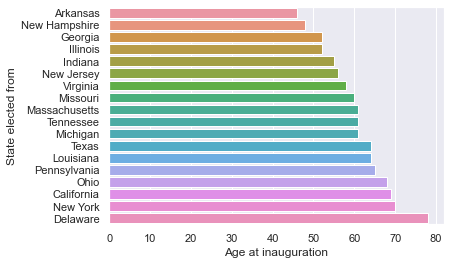

In [54]:
sns.barplot(data=gb, x='Age at inauguration',  y='State elected from', orient='h')